# Summarizing Data

Recap: Downloading data from Google Sheets using Pandas

In [42]:
import pandas as pd
import urllib.parse

sheet_id = '1jUMAa75_psDoYlnhly6Rbevfs_VPdmYuCMvsdXGImPQ'
sheet_name = 'Form Responses 1'

def google_sheet_csv(id, name):
    sheet = urllib.parse.quote_plus(name)
    return f'https://docs.google.com/spreadsheets/d/{id}/gviz/tq?tqx=out:csv&sheet={sheet}'


df = pd.read_csv(google_sheet_csv(sheet_id, sheet_name))

df.head()

,Timestamp,How old are you? (Full years),Which gender do you identify with?,What month were you born in?,Which semester are you studying in?,Which operating system do you use?,What was your Python experience BEFORE the course?,What was your statistics knowledge BEFORE the course?,How long is your daily commute to university? (Estimate one-way in minutes),Do you prefer online or in-person lectures?,Do you prefer a continuous project or isolated exercises?
0,5/14/2024 7:46:13,21,Male,October,1,Windows,Had Python installed and played with it (basic...,Knew some basic concepts (statistical paramete...,45,5,2
1,5/14/2024 7:46:21,27,Diverse,May,1,Windows,Had Python installed and played with it (basic...,Knew some basic concepts (statistical paramete...,90,5,1
2,5/14/2024 7:46:51,24,Male,July,1,Windows,No previous experience,No previous knowledge,40,5,3
3,5/14/2024 7:47:10,28,Male,December,1,Windows,Used Python in class or on personal projects,Knew most of the topics from the course,70,2,4
4,5/14/2024 7:47:49,24,Male,July,1,Windows,No previous experience,No previous knowledge,40,4,3


## Frequencies and Proportions (relative frequencies)

In [43]:
month = df['What month were you born in?']

Find the value that appears most often (mode):

In [44]:
month.mode()

0    December
Name: What month were you born in?, dtype: object

Get a list of all unique values appearing in the data:

In [45]:
month.unique()

array(['October', 'May', 'July', 'December', 'November', 'June',
       'February', 'September', 'March', 'January', 'August', 'April'],
      dtype=object)

Count how often each unique value appears:

In [46]:
month.value_counts()

What month were you born in?
December     7
March        5
October      4
June         4
August       4
May          3
November     3
February     3
January      3
July         2
September    1
April        1
Name: count, dtype: int64

Calculate realtive frequencies of all unique values:

In [47]:
month.value_counts(normalize=True)

What month were you born in?
December     0.175
March        0.125
October      0.100
June         0.100
August       0.100
May          0.075
November     0.075
February     0.075
January      0.075
July         0.050
September    0.025
April        0.025
Name: proportion, dtype: float64

In [48]:
# Proportion of students born in May?
proportions = month.value_counts(normalize=True)
proportions['May']

0.075

In [49]:
age = df['How old are you? (Full years)']

Counting values

In [50]:
age.value_counts().sort_index()

How old are you? (Full years)
21    3
22    7
23    6
24    7
25    5
26    4
27    3
28    3
29    1
44    1
Name: count, dtype: int64

In [51]:
age.value_counts(bins=[20, 25, 30, 35, 40, 45], normalize=False).sort_index()

(19.999, 25.0]    28
(25.0, 30.0]      11
(30.0, 35.0]       0
(35.0, 40.0]       0
(40.0, 45.0]       1
Name: count, dtype: int64

<Axes: >

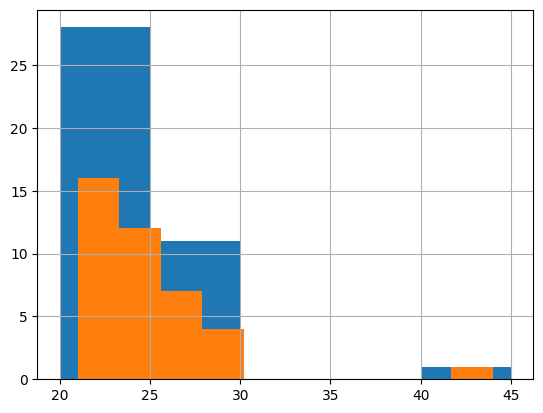

In [52]:
age.hist(bins=[20, 25.0001, 30, 35, 40, 45])
age.hist()

## Mean and median

In [53]:
age.mean(), age.median()

(24.75, 24.0)

Exercise: Robustness of mean and median

In [54]:
import numpy as np

# Get a list from the Pandas Series
ages = age.to_list()

# TODO: Add the number 60 to the list
# YOUR CODE HERE
#ages.append(10000000000)

# Calculate mean and median of the list
np.mean(ages), np.median(ages)

(24.75, 24.0)

Repeat with other numbers than $60$. Also try with extreme values, e.g. negative numbers, large positve numbers, etc.. How are mean and median affected?

Exercise: Variance

In [64]:
mean = np.mean(ages)

dist = []
abs_dist = []
sqd_dist = []

for age in ages:

    # Calculate distance
    dist.append(age - mean)

    # Calculate absolute distance
    abs_dist.append(abs(age - mean))

    # Calculate squared distance
    sqd_dist.append(pow(age - mean, 2))

np.sum(dist) / (len(dist) - 1)

14.346153846153847

In [68]:
var = df['How old are you? (Full years)'].var()
var

14.346153846153847

In [69]:
import math

std = df['How old are you? (Full years)'].std()

std, math.sqrt(var)

(3.787631693572363, 3.787631693572363)

In [ ]:
mean = np.mean(ages)

dist = []
abs_dist = []
sqd_dist = []

for age in ages:

    # Calculate distance
    dist.append(age - mean)

    # Calculate absolute distance
    abs_dist.append(abs(age - mean))

    # Calculate squared distance
    sqd_dist.append(pow(age - mean, 2))